In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
filename = '../data/csv/dpc-covid19-ita-regioni.csv'
df = pd.read_csv(filename)


In [95]:
d_from = '2020-03-01'
d_to = '2020-04-15'
#FIELD = 'totale_positivi'
FIELD = 'dimessi_guariti'
FIELD2 = 'ricoverati_con_sintomi'

REGION = 'Piemonte'

df = df[(df['data'] >= d_from) & (df['data'] <= d_to)]
df = df[['data', 'denominazione_regione', FIELD, FIELD2]]

df['data'] = pd.to_datetime(df['data'])
df['data'] = df['data'].dt.strftime('%d/%m')


In [96]:
df_region = df[df['denominazione_regione'].isin([REGION])]
df_region = df_region.rename(columns={'dimessi_guariti': "Dimessi Guariti"})
df_region = df_region.rename(columns={'ricoverati_con_sintomi': "Ricoverati"})


In [97]:
df_region['Prev Dimessi Guariti'] = df_region['Dimessi Guariti'].shift(1)
df_region['Prev Ricoverati'] = df_region['Ricoverati'].shift(1)

#df_region.rename(columns={FIELD:'curr'}, inplace=True)
df_region['Diff Dimessi Guariti'] = df_region['Dimessi Guariti']  - df_region['Prev Dimessi Guariti']
df_region['Diff Ricoverati'] = df_region['Ricoverati']  - df_region['Prev Ricoverati']

df_region

,data,denominazione_regione,Dimessi Guariti,Ricoverati,Prev Dimessi Guariti,Prev Ricoverati,Diff Dimessi Guariti,Diff Ricoverati
138,01/03,Piemonte,0,11,NaN,NaN,NaN,NaN
159,02/03,Piemonte,0,12,0.0,11.0,0.0,1.0
180,03/03,Piemonte,0,13,0.0,12.0,0.0,1.0
201,04/03,Piemonte,0,26,0.0,13.0,0.0,13.0
222,05/03,Piemonte,0,43,0.0,26.0,0.0,17.0
243,06/03,Piemonte,0,57,0.0,43.0,0.0,14.0
264,07/03,Piemonte,0,110,0.0,57.0,0.0,53.0
285,08/03,Piemonte,0,245,0.0,110.0,0.0,135.0
306,09/03,Piemonte,0,222,0.0,245.0,0.0,-23.0
327,10/03,Piemonte,0,306,0.0,222.0,0.0,84.0


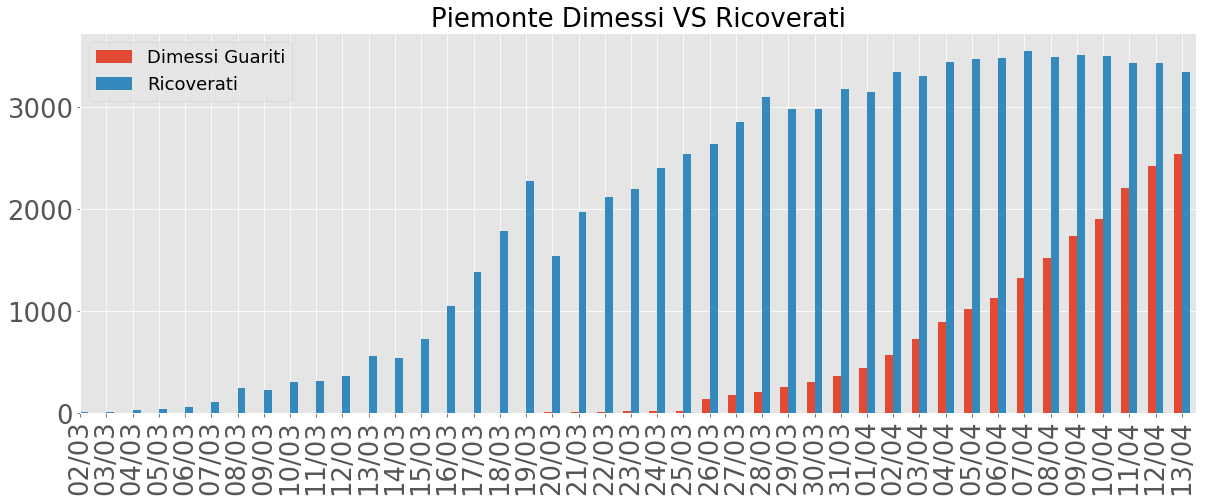

In [92]:
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.labelsize': 18})
#plt.rcParams['axes.facecolor'] = 'lightslategray'
plt.rcParams.update({'xtick.labelsize': 'x-large'})
plt.rcParams.update({'ytick.labelsize': 'x-large'})

#['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 
# 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 
#'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk',  'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
#ax.set_axis_bgcolor("lightslategray")

#ax = lombardia_data.plot(x='data', y=FIELD, figsize=(20,10), kind='bar', color='b')
ax = df_region.plot.bar(x='data', figsize=(20,7), width = 0.60)

ax.set_xlabel('')

ax.xaxis.set_major_locator(MultipleLocator(1))

ax.set_xlim(left=1)
#ax.set_ylim(bottom=0)

ax.set_title(REGION + ' Dimessi VS Ricoverati')
#ax.get_legend().remove()


plt.show()